In [8]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

Dataset: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [9]:
# Load the dataset;
dataset = np.load("/content/dataset.npy")

In [10]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (300, 2)


# Data preparation

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

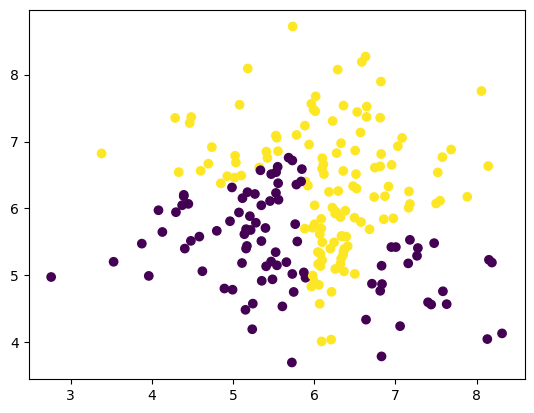

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

# (Linear) model training

## Basic model training

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [14]:
y_train_pred = model.predict(X_train)

accuracy = np.mean(y_train_pred == y_train)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.7380952380952381


In [15]:
y_train_pred = model.predict_proba(X_train)

## Visualization of predictions

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

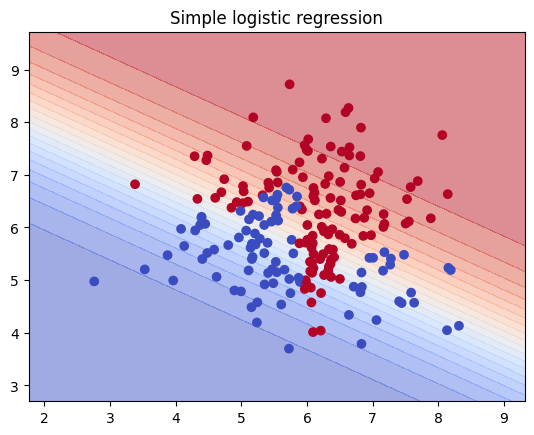

In [18]:
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Simple logistic regression")
plt.show()

## Non-linear logistic regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 5, 8]

for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_val_poly = poly.transform(X_val)

  model = LogisticRegression(penalty=None)
  model.fit(X_train_poly, y_train)

  y_train_pred = model.predict(X_train_poly)
  train_accuracy = np.mean(y_train_pred == y_train)

  y_val_pred = model.predict(X_val_poly)
  accuracy = np.mean(y_val_pred == y_val)


  print(f"Degree {degree}: Training Accuracy = {train_accuracy}")
  print(f"Degree {degree}: Validation Accuracy = {accuracy}")

Degree 2: Training Accuracy = 0.780952380952381
Degree 2: Validation Accuracy = 0.8444444444444444
Degree 3: Training Accuracy = 0.9047619047619048
Degree 3: Validation Accuracy = 0.8666666666666667
Degree 5: Training Accuracy = 0.8904761904761904
Degree 5: Validation Accuracy = 0.8888888888888888
Degree 8: Training Accuracy = 0.8857142857142857
Degree 8: Validation Accuracy = 0.8444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(penalty=None)
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)
accuracy = np.mean(y_test_pred == y_test)

print(accuracy)

0.8222222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [22]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('logreg', LogisticRegression(max_iter=500))
])

In [23]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg', LogisticRegression(max_iter=500))])

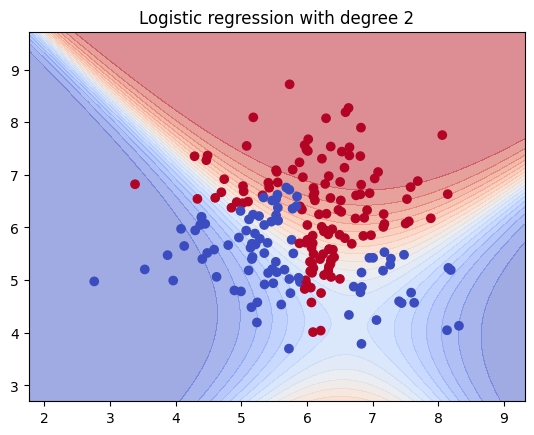

In [24]:

disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 2")
plt.show()

In [25]:
x_mean = np.mean(X_train[:, 0])
x_std = np.std(X_train[:, 0])
y_mean = np.mean(X_train[:, 1])
y_std = np.std(X_train[:, 1])

print(f"Mean of x: {x_mean}")
print(f"Standard deviation of x: {x_std}")
print(f"Mean of y: {y_mean}")
print(f"Standard deviation of y: {y_std}")

Mean of x: 5.961183864765839
Standard deviation of x: 0.9717729313034712
Mean of y: 5.954393316635144
Standard deviation of y: 0.9439087521142389


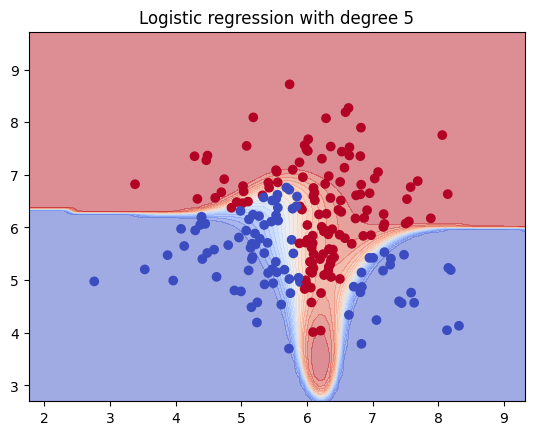

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5)),
    ('logreg', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 5")
plt.show()


## Regularization and k-fold cross-validation

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

In [29]:
hyperparameters = {
    'poly__include_bias': [True, False],
    'logreg__fit_intercept': [True, False]
}

In [30]:
gridsearch = GridSearchCV(clf_pipeline, hyperparameters, verbose=2)
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END logreg__fit_intercept=True, poly__include_bias=True; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=True; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=True; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=True; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=True; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=False; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=False; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=False; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=False; total time=   0.0s
[CV] END logreg__fit_intercept=True, poly__include_bias=False; total time=   0.0s
[CV] END logreg__fit_intercept=False, poly__include_bias=True; total time=   0.0s
[CV] END logreg__fit_intercept=False, poly_

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('logreg',
                                        LogisticRegression(max_iter=500,
                                                           solver='liblinear'))]),
             param_grid={'logreg__fit_intercept': [True, False],
                         'poly__include_bias': [True, False]},
             verbose=2)

In [31]:
gridsearch.cv_results_["mean_test_score"]

array([0.76666667, 0.76666667, 0.76666667, 0.74285714])

In [32]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(max_iter=500, solver='liblinear'))])

In [33]:
X_fold = np.concatenate((X_train, X_val))
y_fold = np.concatenate((y_train, y_val))

In [34]:
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

hyperparameters = {
    'poly__degree': [1, 2, 3, 4, 5],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10]
}

gridsearch = GridSearchCV(clf_pipeline, hyperparameters, cv=10)
gridsearch.fit(X_fold, y_fold)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_
y_test_pred = best_model.predict(X_test)

{'logreg__C': 10, 'poly__degree': 5}


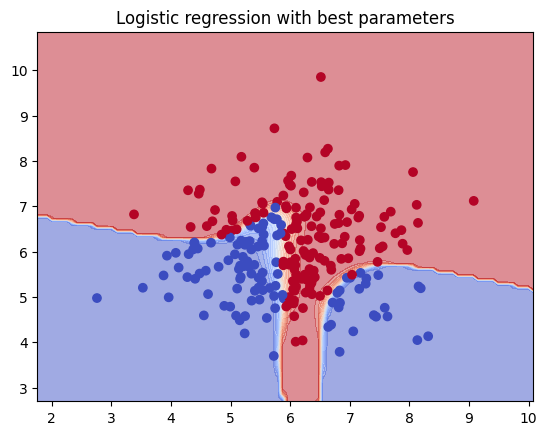

In [35]:
disp = DecisionBoundaryDisplay.from_estimator(
    best_model, X_fold,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_fold[:, 0], X_fold[:, 1], c=y_fold, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with best parameters")
plt.show()

In [36]:
test_accuracy = np.mean(y_test_pred == y_test)
print("Test Accuracy with best model:", test_accuracy)

Test Accuracy with best model: 0.9777777777777777


# Exploration of other algorithms

## K-Nearest Neighbors

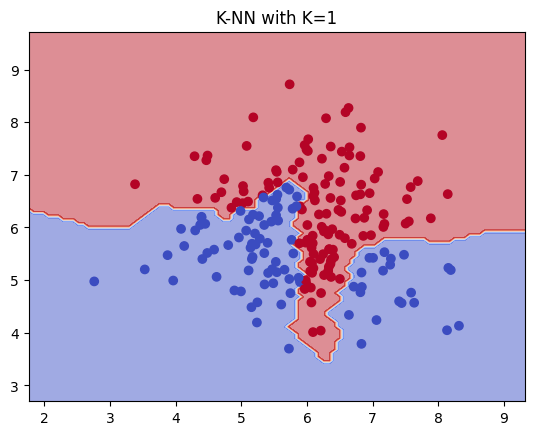

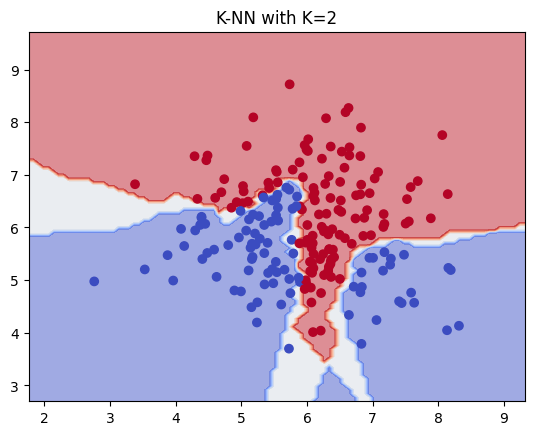

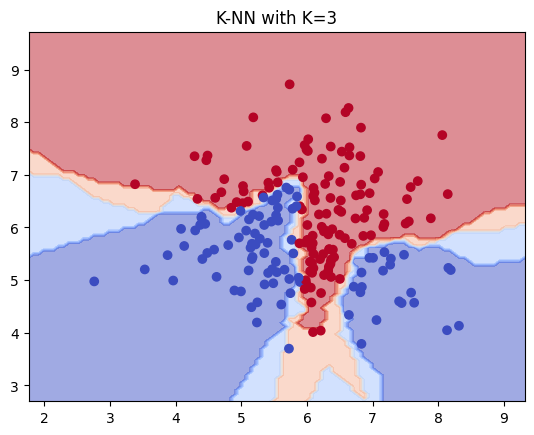

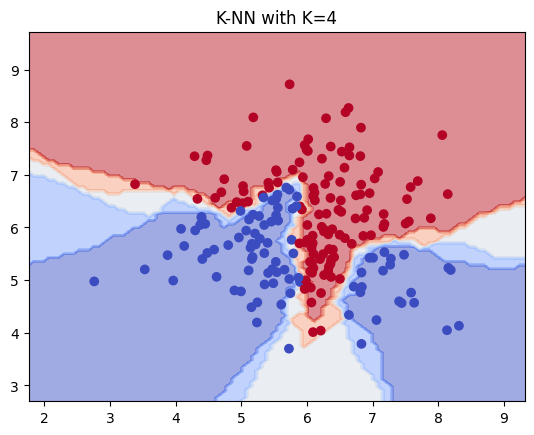

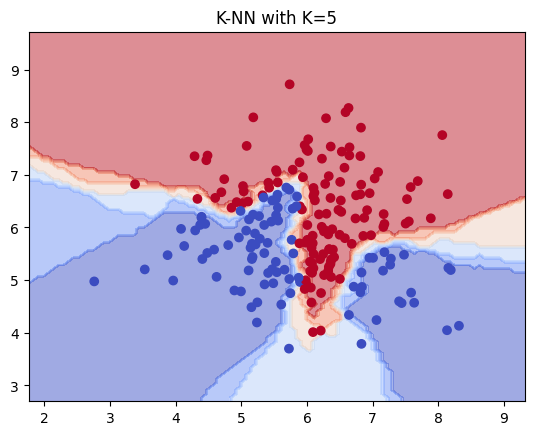

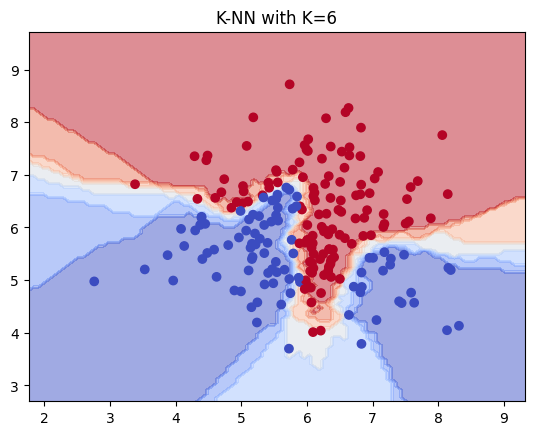

In [37]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 7):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  disp = DecisionBoundaryDisplay.from_estimator(
      knn, X_train,
      response_method="predict_proba",
      cmap=plt.cm.coolwarm,
      alpha=0.5,
      levels=20
  )
  disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
  plt.title(f"K-NN with K={k}")
  plt.show()

## Naive Bayes

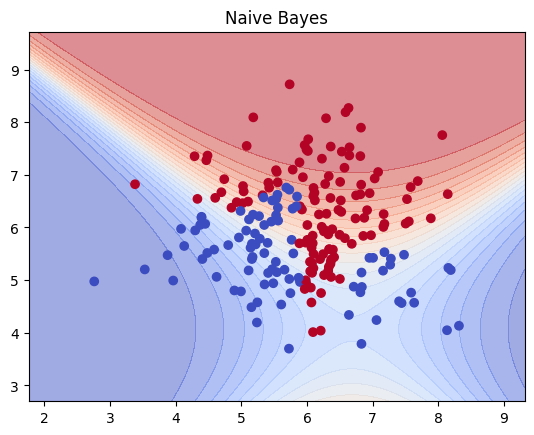

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    nb, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Naive Bayes")
plt.show()

## Decision tree

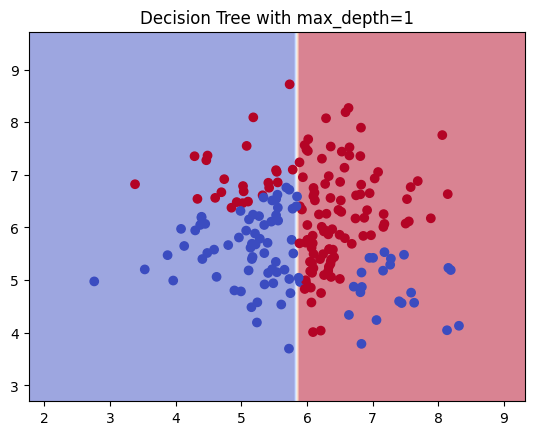

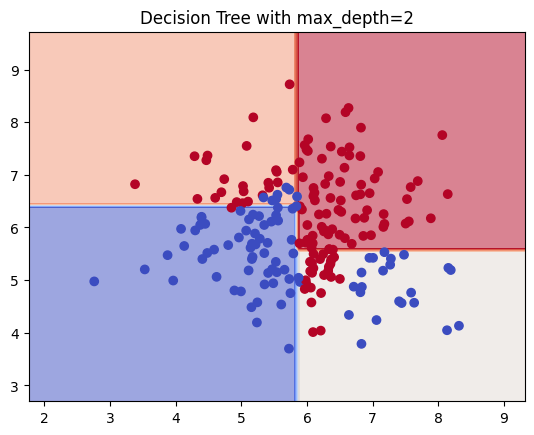

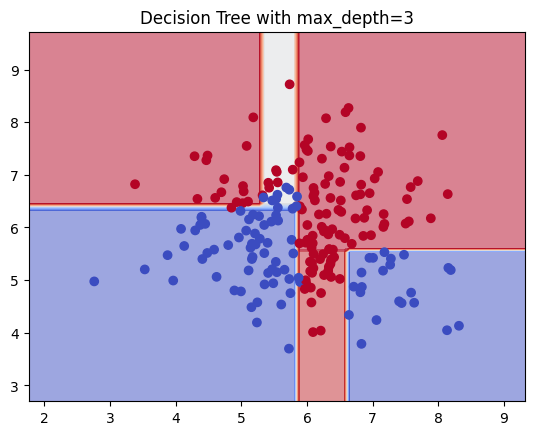

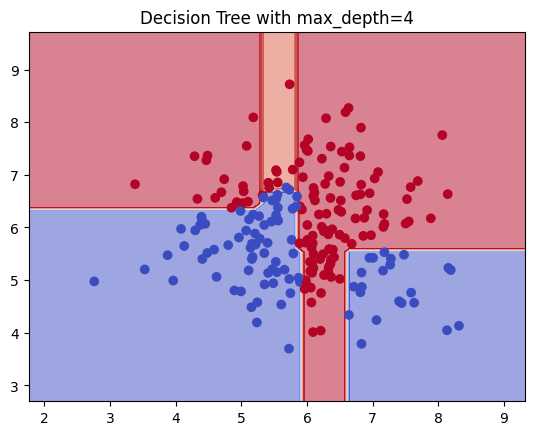

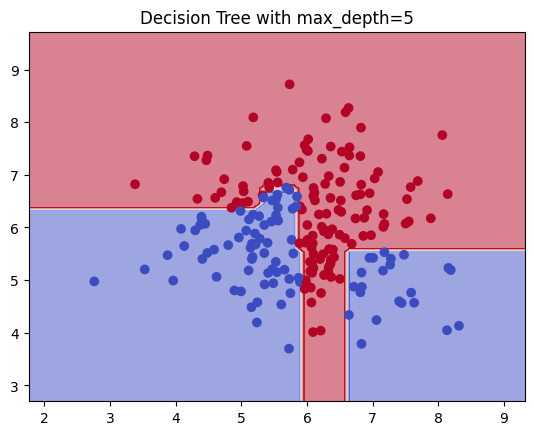

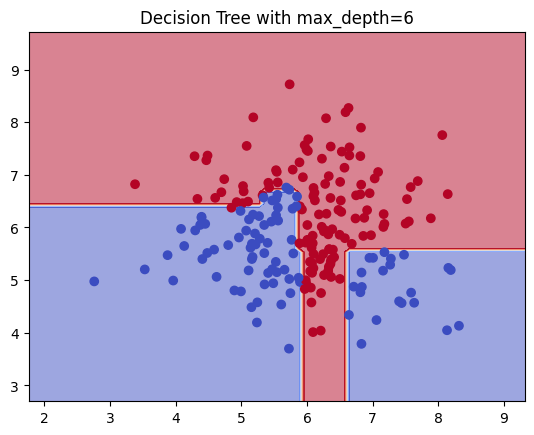

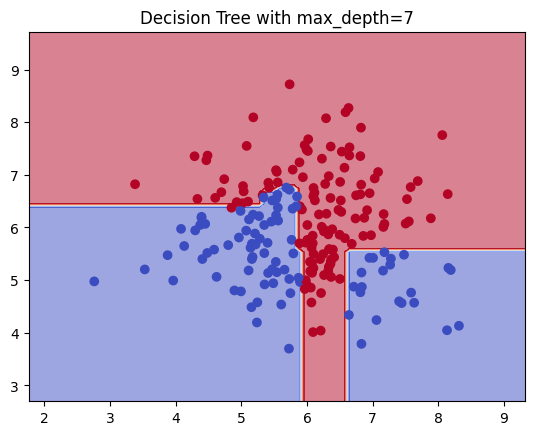

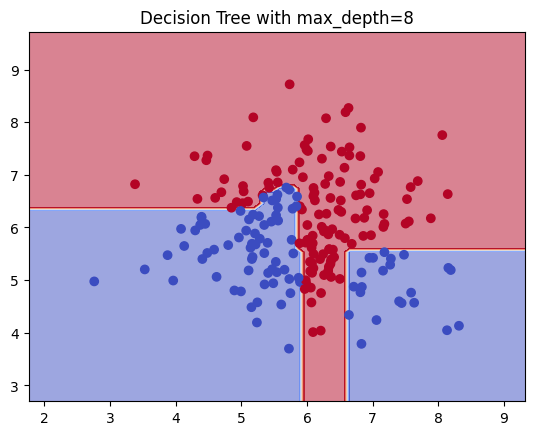

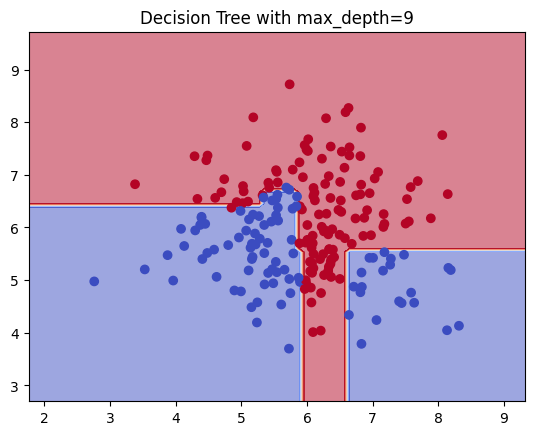

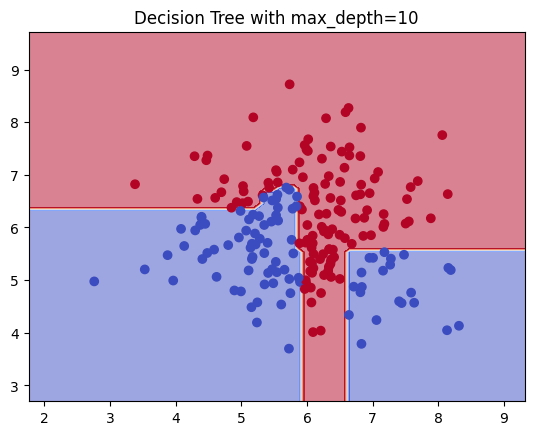

In [39]:
from sklearn.tree import DecisionTreeClassifier

for max_depth in range(1, 11):
  dt = DecisionTreeClassifier(max_depth=max_depth)
  dt.fit(X_train, y_train)

  disp = DecisionBoundaryDisplay.from_estimator(
      dt, X_train,
      response_method="predict_proba",
      cmap=plt.cm.coolwarm,
      alpha=0.5,
      levels=100
  )

  disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
  plt.title(f"Decision Tree with max_depth={max_depth}")
  plt.show()

## SVM

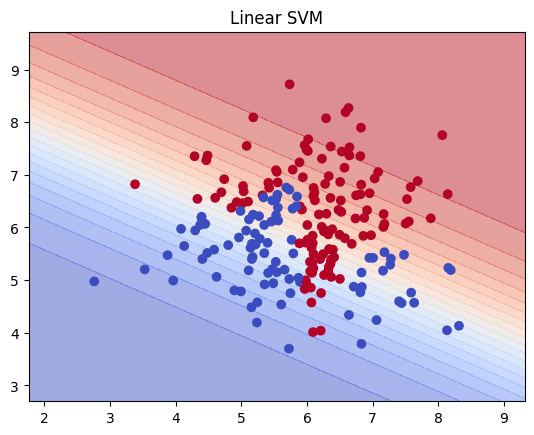

In [40]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svm, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Linear SVM")
plt.show()

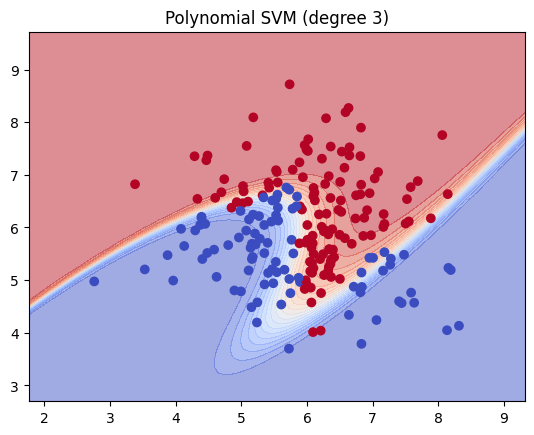

In [41]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

svm_poly = SVC(kernel='linear', probability=True)
svm_poly.fit(X_train_poly, y_train)

pipeline_svm_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('svm', SVC(kernel='linear', probability=True))
])
pipeline_svm_poly.fit(X_train, y_train)


disp = DecisionBoundaryDisplay.from_estimator(
    pipeline_svm_poly, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Polynomial SVM (degree 3)")
plt.show()

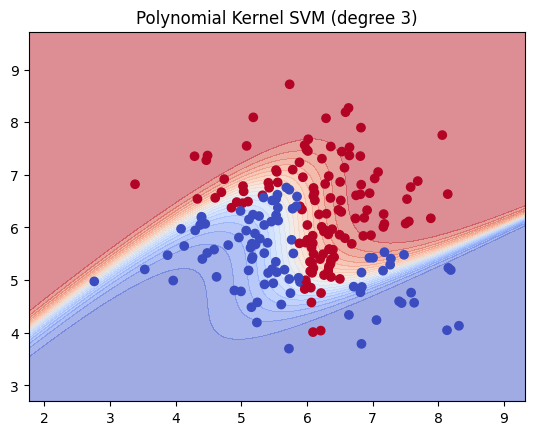

In [42]:
svm_poly_kernel = SVC(kernel='poly', degree=3, probability=True)
svm_poly_kernel.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svm_poly_kernel, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Polynomial Kernel SVM (degree 3)")
plt.show()

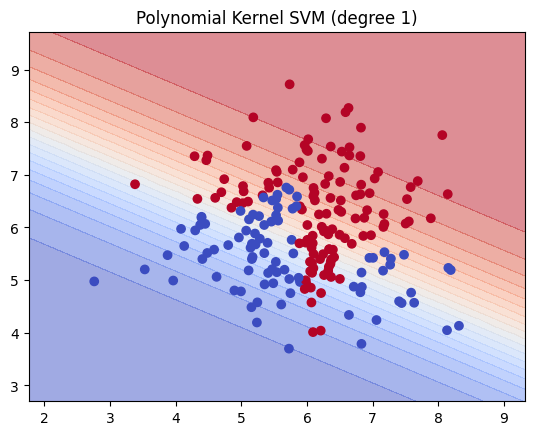

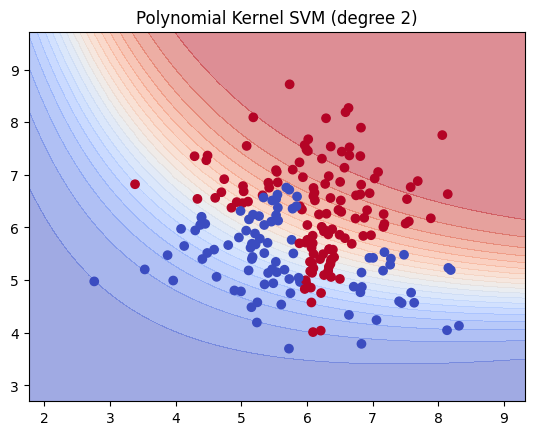

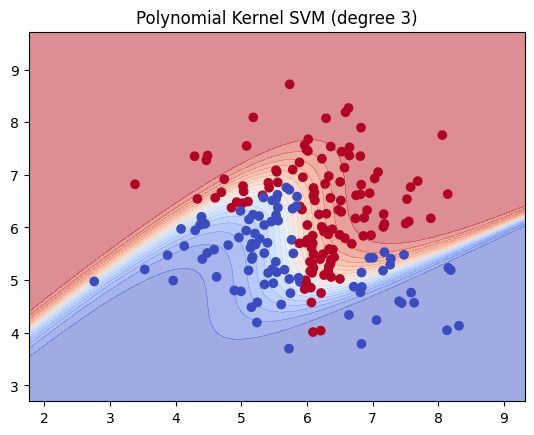

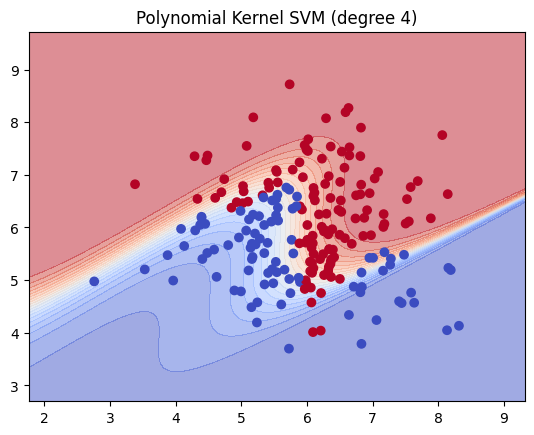

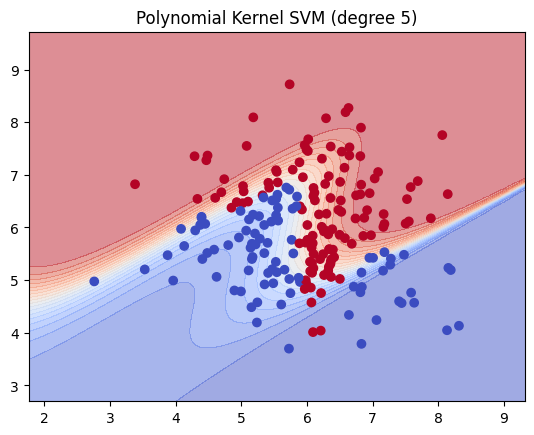

In [43]:
for degree in range(1, 6):
  svm_poly_kernel = SVC(kernel='poly', degree=degree, probability=True)
  svm_poly_kernel.fit(X_train, y_train)

  disp = DecisionBoundaryDisplay.from_estimator(
      svm_poly_kernel, X_train,
      response_method="predict_proba",
      cmap=plt.cm.coolwarm,
      alpha=0.5,
      levels=20
  )
  disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
  plt.title(f"Polynomial Kernel SVM (degree {degree})")
  plt.show()

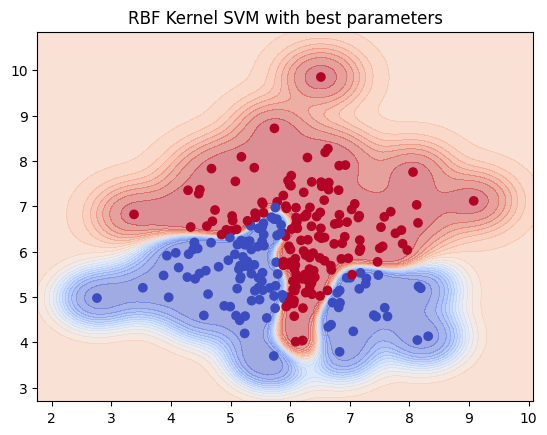

In [44]:
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

hyperparameters = {
    'svm__C': [0.1, 1, 3, 5, 10],
    'svm__gamma': [0.1, 1, 3, 5, 10]
}

gridsearch = GridSearchCV(clf_pipeline, hyperparameters, cv=10)
gridsearch.fit(X_fold, y_fold)
best_model_rbf = gridsearch.best_estimator_

disp = DecisionBoundaryDisplay.from_estimator(
    best_model_rbf, X_fold,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
disp.ax_.scatter(X_fold[:, 0], X_fold[:, 1], c=y_fold, cmap=plt.cm.coolwarm)
plt.title("RBF Kernel SVM with best parameters")
plt.show()